<a href="https://colab.research.google.com/github/kvmkrao/cdml/blob/master/CovidDataAnalysis_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.subplots import make_subplots 
from datetime import datetime 
import io
import requests
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls 
!rm -rf covid-19-data

drive  sample_data


In [3]:
! git clone --depth 1   https://github.com/nytimes/covid-19-data.git

Cloning into 'covid-19-data'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 3), reused 31 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.
Checking out files: 100% (34/34), done.


In [4]:
!ls  
#!ls covid-19-data/* 
!rm -rf covid-19-data/LICENSE covid-19-data/colleges covid-19-data/excess-deaths covid-19-data/live covid-19-data/mask-use covid-19-data/prisons covid-19-data/rolling-averages

covid-19-data  drive  sample_data


In [5]:
#url = "https://github.com/nytimes/covid-19-data/blob/master/us-states.csv"
#r = requests.get(url)
#print(len(r.content))
#open('us-states.csv', 'wb').write(r.content)

#with open('us-states.csv', 'w') as f:
#  f.write(str(r.content))

#files.download('example.txt')

covid_df = pd.read_csv("covid-19-data/us-states.csv") 

covid_df.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [6]:
covid_df.drop( ["fips"], inplace=True, axis=1)
covid_df.head(10)

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
5,2020-01-25,California,1,0
6,2020-01-25,Illinois,1,0
7,2020-01-25,Washington,1,0
8,2020-01-26,Arizona,1,0
9,2020-01-26,California,2,0


In [7]:
covid_df.describe() # for numerical columns only
covid_df.isnull().sum()
covid_df = covid_df.dropna() # drop na and clean data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38590 entries, 0 to 38589
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    38590 non-null  object
 1   state   38590 non-null  object
 2   cases   38590 non-null  int64 
 3   deaths  38590 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


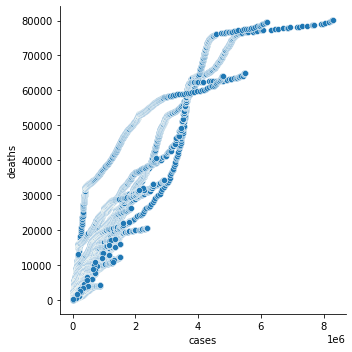

In [8]:
covid_df.info()
sns.relplot(x='cases', y='deaths', data=covid_df)

In [9]:
covid_df['date'] = pd.to_datetime(covid_df['date'], format= '%Y-%m-%d')
covid_df.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [10]:
statewise = pd.pivot_table(covid_df, values=["cases", "deaths"], index="state", aggfunc=max)

In [11]:
statewise["mortality_rate"] = statewise["deaths"]*100/statewise["cases"]

In [12]:
statewise = statewise.sort_values(by="cases", ascending= False)

In [13]:
statewise.style.background_gradient(cmap = "Blues")

,cases,deaths,mortality_rate
state,,,
California,8287535,80038,0.965764
Texas,6192817,79621,1.285699
Florida,5501599,64955,1.180657
New York,4779854,64176,1.342635
Illinois,2901790,34439,1.186819
Pennsylvania,2656587,40563,1.526884
Ohio,2576245,33071,1.283690
North Carolina,2373587,20605,0.868095
Georgia,2281370,31595,1.384913


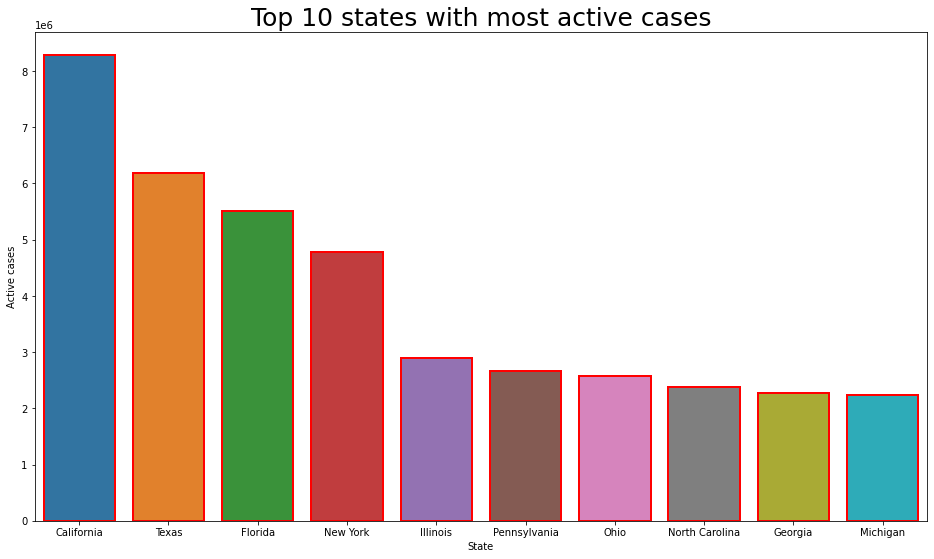

In [14]:
# top 10 activate cases states
top_10_active_states = covid_df.groupby(by="state").max()[["cases","date"]].sort_values(by =["cases"],ascending = False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases", size=25)
ax = sns.barplot(data = top_10_active_states.iloc[:10], y= "cases", x='state', linewidth =2, edgecolor= 'red')  
plt.xlabel('State')
plt.ylabel('Active cases')
plt.show()

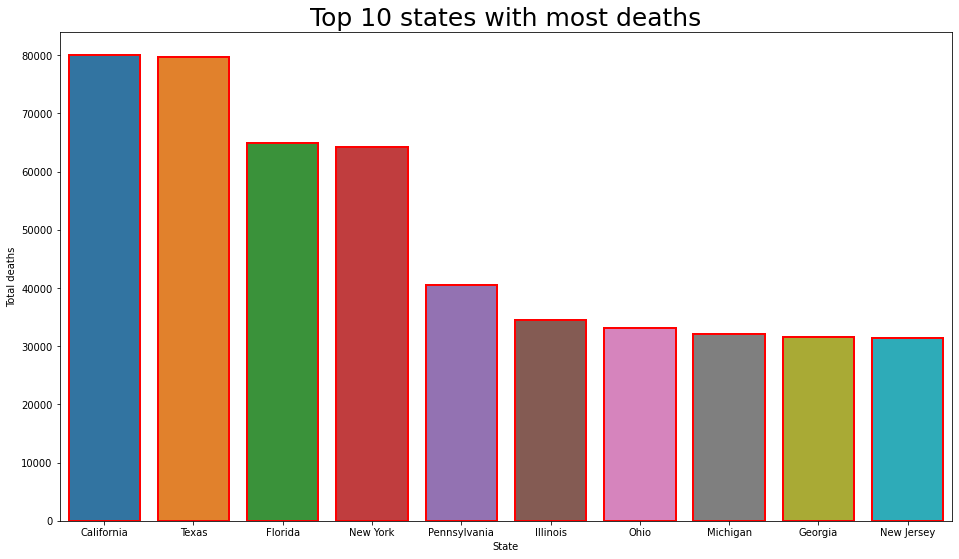

In [15]:
# top 10 activate cases states
top_10_death_states = covid_df.groupby(by="state").max()[["deaths","date"]].sort_values(by =["deaths"],ascending = False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most deaths", size=25)
ax = sns.barplot(data = top_10_death_states.iloc[:10], y= "deaths", x='state', linewidth =2, edgecolor= 'red')  
plt.xlabel('State')
plt.ylabel('Total deaths')
plt.show()

Text(0.5, 1.0, 'Top 10 affected states in US')

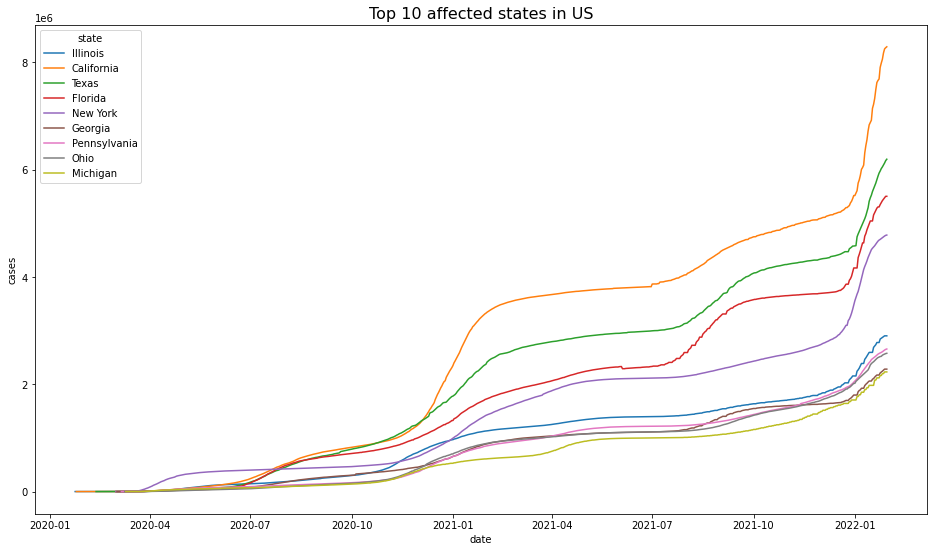

In [16]:
fig=plt.figure(figsize=(16,9)) 
ax = sns.lineplot(data=covid_df[covid_df["state"].isin(["California",'Texas', 'Florida','New York','Pennsylvania', 'Illinois', 'Georgia','Ohio','Michigan','New jersey'])], x='date', y="cases",hue='state')
ax.set_title("Top 10 affected states in US", size=16) 


In [ ]:
sns.pairplot(covid_df) # Plot pairwise relationships in a dataset

In [31]:
cols = ['state']
covid_df['cases'] = covid_df.groupby(cols)['cases'].diff().fillna(0)
covid_df['deaths'] = covid_df.groupby(cols)['deaths'].diff().fillna(0)
print(covid_df)

            date          state     cases  deaths
0     2020-01-21     Washington       0.0     0.0
1     2020-01-22     Washington       0.0     0.0
2     2020-01-23     Washington       0.0     0.0
3     2020-01-24       Illinois       0.0     0.0
4     2020-01-24     Washington       0.0     0.0
...          ...            ...       ...     ...
38585 2022-01-30       Virginia   28600.0     0.0
38586 2022-01-30     Washington  199569.0     0.0
38587 2022-01-30  West Virginia     778.0     0.0
38588 2022-01-30      Wisconsin   19741.0     0.0
38589 2022-01-30        Wyoming    1855.0     0.0

[38590 rows x 4 columns]


(0.0, 1000000.0)

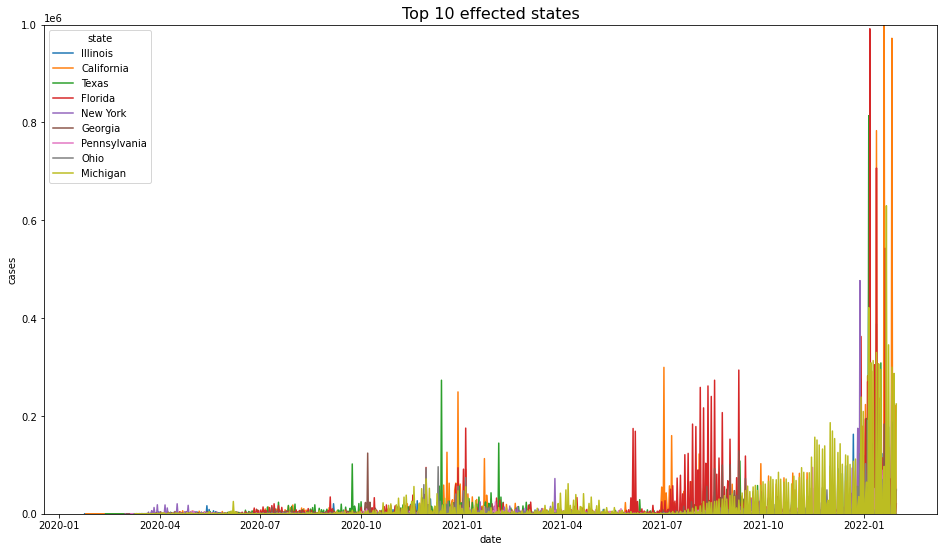

In [43]:
fig=plt.figure(figsize=(16,9)) 
ax = sns.lineplot(data=covid_df[covid_df["state"].isin(["California",'Texas', 'Florida','New York','Pennsylvania', 'Illinois', 'Georgia','Ohio','Michigan','New jersey'])], x='date', y="cases",hue='state')
ax.set_title("Top 10 effected states", size=16) 
plt.ylim(0, 1000000)

(0.0, 2000.0)

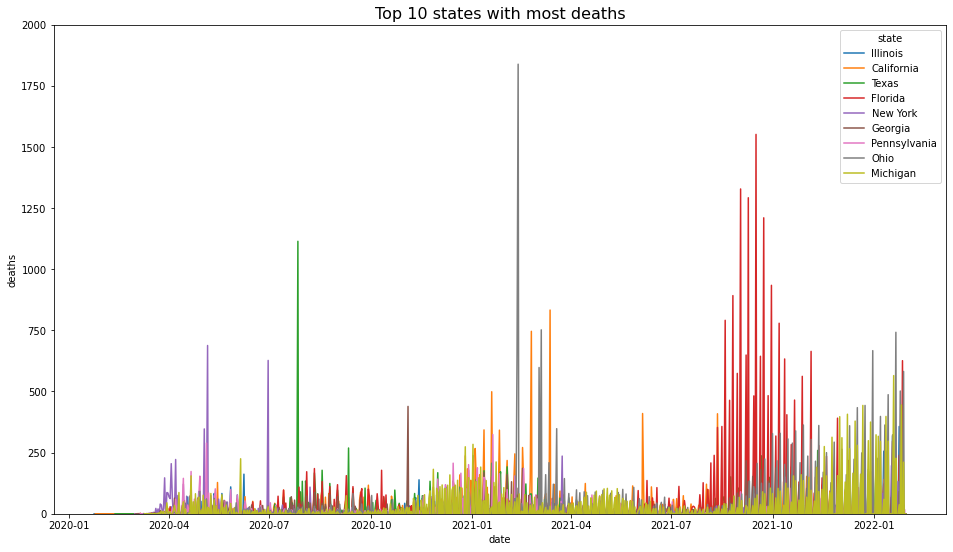

In [36]:
fig=plt.figure(figsize=(16,9)) 
ax = sns.lineplot(data=covid_df[covid_df["state"].isin(["California",'Texas', 'Florida','New York','Pennsylvania', 'Illinois', 'Georgia','Ohio','Michigan','New jersey'])], x='date', y="deaths",hue='state')
ax.set_title("Top 10 states with most deaths", size=16) 
plt.ylim(0, 2000)

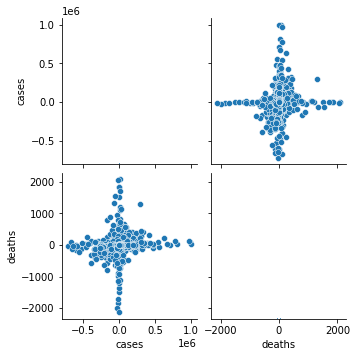

In [44]:
sns.pairplot(covid_df) # Plot pairwise relationships in a dataset

,date,state,cases,deaths
5,2020-01-25,California,1,0
9,2020-01-26,California,2,0
13,2020-01-27,California,2,0
17,2020-01-28,California,2,0
21,2020-01-29,California,2,0
25,2020-01-30,California,2,0
29,2020-01-31,California,3,0
33,2020-02-01,California,3,0
38,2020-02-02,California,6,0
43,2020-02-03,California,6,0


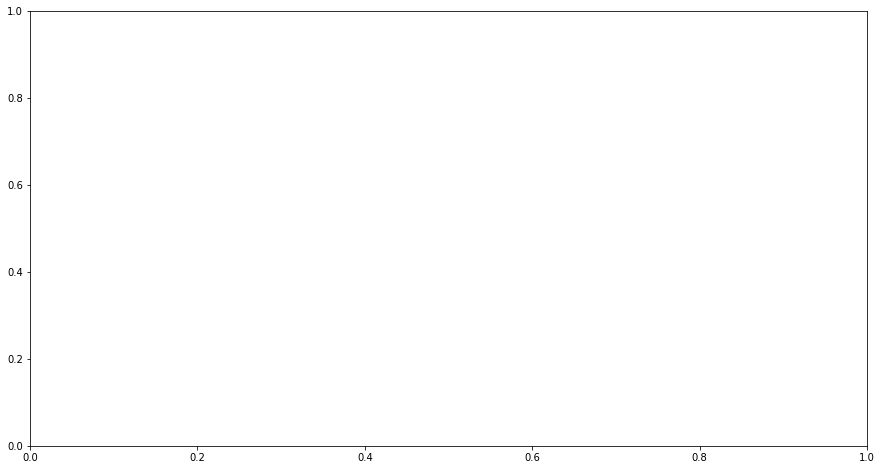

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
# use unstack()
state_california=covid_df[covid_df["state"].isin(["California"])]
state_california.head(10)